<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#C20E83;overflow:hidden;font-weight:800">STUDENTS PERFORMANCE IN EXAMS</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

To understand the influence of parental background, test preparation, etc. on student performance

**Columns**

1. gender : sex of students
2. race/ethnicity : ethnicity of students
3. parental level of education : parents' final education
4. lunch : having lunch before test (normal or abnormal)
5. test preparation course : complete or not complete before test

**Target**

6. math score
7. reading score
8. writing score

## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Import Libraries</div></b>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Download Dataset</div></b>

In [3]:
file = "../input/students-performance-in-exams/StudentsPerformance.csv"
df = pd.read_csv(file)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [4]:
# Simplifying column names

df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parental_education",
                         "test preparation course":"pre",
                         "math score":"math","reading score":"reading","writing score":"writing"},inplace=True)
df.head()

,gender,ethnicity,parental_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Check Dataset

print('### 5 sample ###','\n')
df.sample(5)

### 5 sample ### 



,gender,ethnicity,parental_education,lunch,pre,math,reading,writing
18,male,group C,master's degree,free/reduced,completed,46,42,46
498,female,group B,some high school,standard,none,66,69,68
446,male,group D,some college,free/reduced,none,69,66,60
305,male,group A,some college,standard,none,69,67,69
888,female,group D,some college,free/reduced,none,69,65,74


In [6]:
# Check Dataframe information

print('### Dataframe information ###','\n')
df.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   ethnicity           1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   pre                 1000 non-null   object
 5   math                1000 non-null   int64 
 6   reading             1000 non-null   int64 
 7   writing             1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Null Data

print('### Total Null Data in DataFrame ###','\n')
df.isnull().sum().sum()

### Total Null Data in DataFrame ### 



0

In [8]:
# Check duplicate data

print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [9]:
# Numeric features

df.iloc[:, :].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
writing,1000.000000,68.054000,15.195657,10.000000,57.750000,69.000000,79.000000,100.000000
math,1000.000000,66.089000,15.163080,0.000000,57.000000,66.000000,77.000000,100.000000
reading,1000.000000,69.169000,14.600192,17.000000,59.000000,70.000000,79.000000,100.000000


In [10]:
# Checking target data asymmetry
df.skew()

math      -0.278935
reading   -0.259105
writing   -0.289444
dtype: float64

In [11]:
# Correlação entre dados target
df.corr()

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#C20E83'> Gender</span></b>  

In [12]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

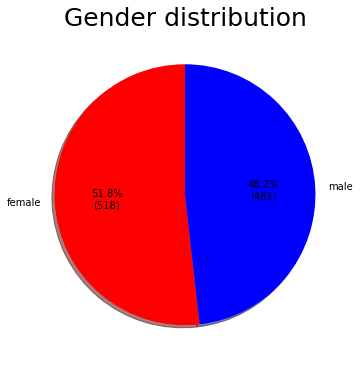

In [13]:
# gender

gender_counts=df.gender.value_counts()
plt.figure(figsize=(12,6))
plt.title('Gender distribution',size=25)


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct=lambda pct: func(pct,gender_counts),
        startangle=90,
        colors=("red","blue"),
        shadow=True);


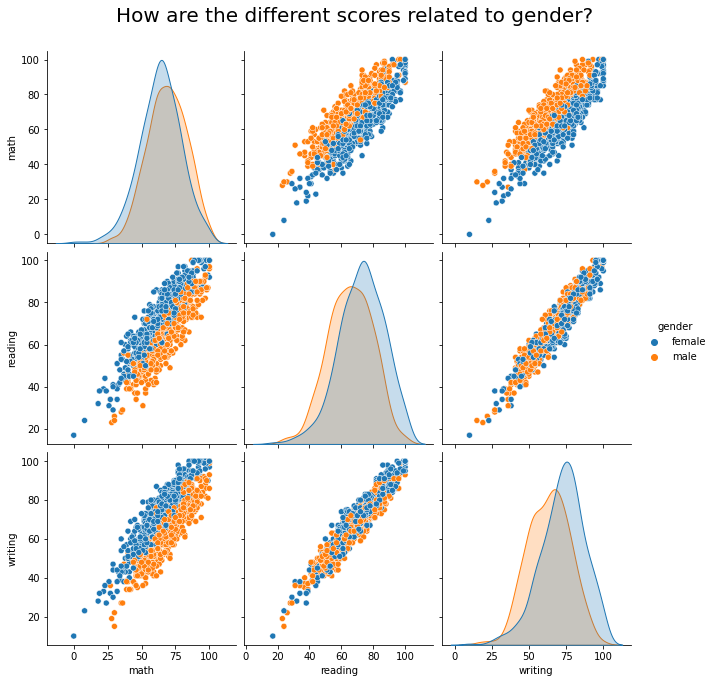

In [14]:
fig = sns.pairplot(df[["math", "reading", "writing", "gender"]], hue="gender", height=3);
fig.fig.suptitle("How are the different scores related to gender?", size=20, y=1.05);

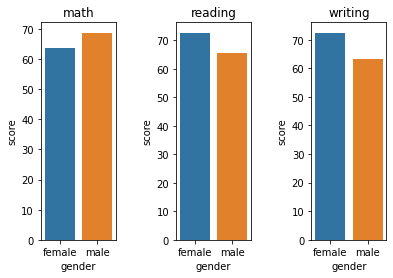

In [15]:
# gender
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.0)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    
plt.show()

# Conclusions - Gender

1. We see that there are slightly more female students than male students
2. Females have better grades in reading and writing and males in mathematics

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#C20E83'> Ethicity</span></b>  

In [16]:
df['ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

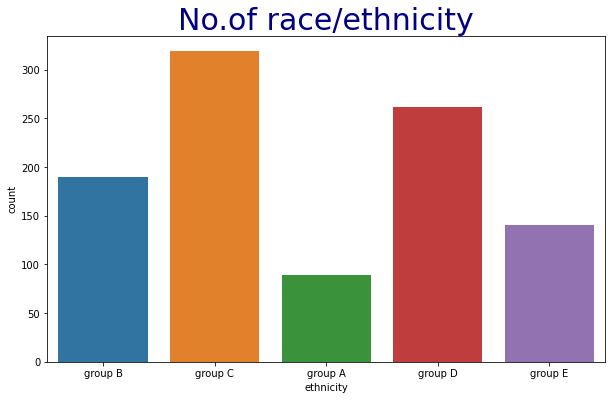

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='ethnicity');
plt.title("No.of race/ethnicity",size=30,color='navy');

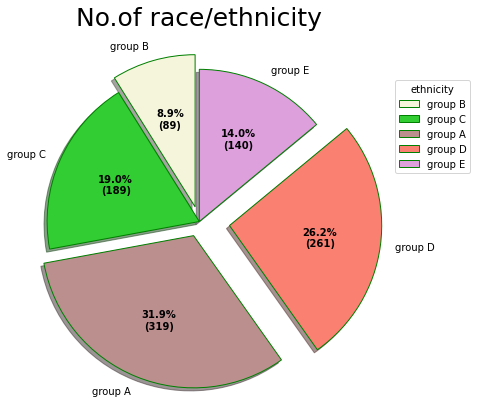

In [18]:
# Creating dataset
race_eth=df['ethnicity'].unique().tolist()
df_eth = df.groupby(['ethnicity'])['ethnicity'].count().to_frame('Total')
data=df_eth['Total'].tolist()

# Creating explode data
explode = (0.1, 0.0, 0.1, 0.2, 0.0)

# Creating color parameters
colors=("beige","limegreen","rosybrown","salmon","plum")

#Wedge properties
wp={'linewidth':1,'edgecolor':'green'}

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig,ax=plt.subplots(figsize=(10,7))
wedges,texts, autotexts=ax.pie(data,
                               autopct=lambda pct: func(pct, data),
                               explode=explode,
                               labels=race_eth,
                               shadow=True,
                               colors=colors,
                               startangle=90,
                               wedgeprops=wp,
                               textprops=dict(color="black"))

# Adding legend
ax.legend(wedges, race_eth,
          title ="ethnicity",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1.5))
 
plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("No.of race/ethnicity",size=25)
 
# show plot
plt.show()


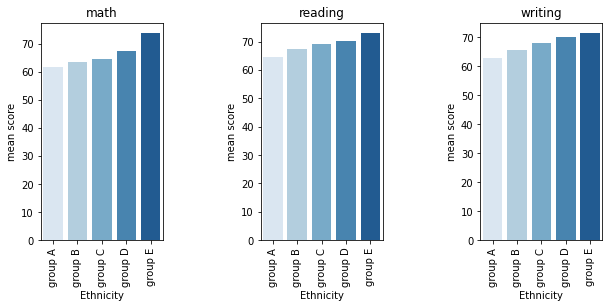

In [19]:
# ethnicity
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = df.groupby("ethnicity")[list(df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Blues")
    plt.xlabel("Ethnicity")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(df.columns[-3:])[idx])
plt.show()

# Conclusions - Race / Ethnicity

1. Group 'E' has the best results and group 'A' has the worst results in all subjects
2. The largest group is 'A' (31.9%) and the smallest is group 'B' (8.9%)

### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#C20E83'> test preparation course</span></b> 

In [20]:
df['pre'].value_counts()

none         642
completed    358
Name: pre, dtype: int64

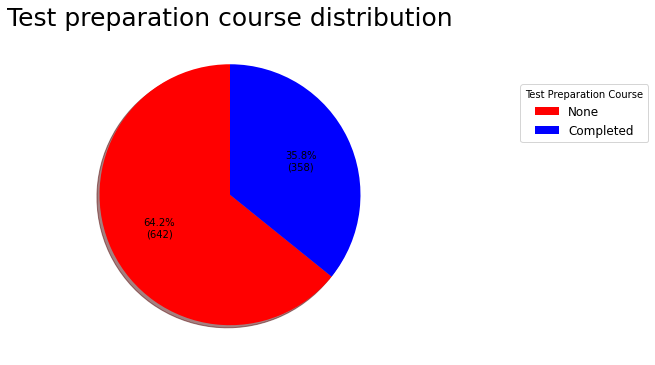

In [21]:
#Pie plot for Test preparation course
test_pre_counts=df['pre'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Test preparation course distribution',size=25)


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(test_pre_counts,
        autopct=lambda pct: func(pct,gender_counts),
        startangle=90,
        colors=("red","blue"),
        shadow=True)

plt.legend(loc="center right",
           labels=["None", "Completed"],
           bbox_to_anchor =(1.3, 0, 0.5, 1.5),
           title="Test Preparation Course",
           fontsize=12);

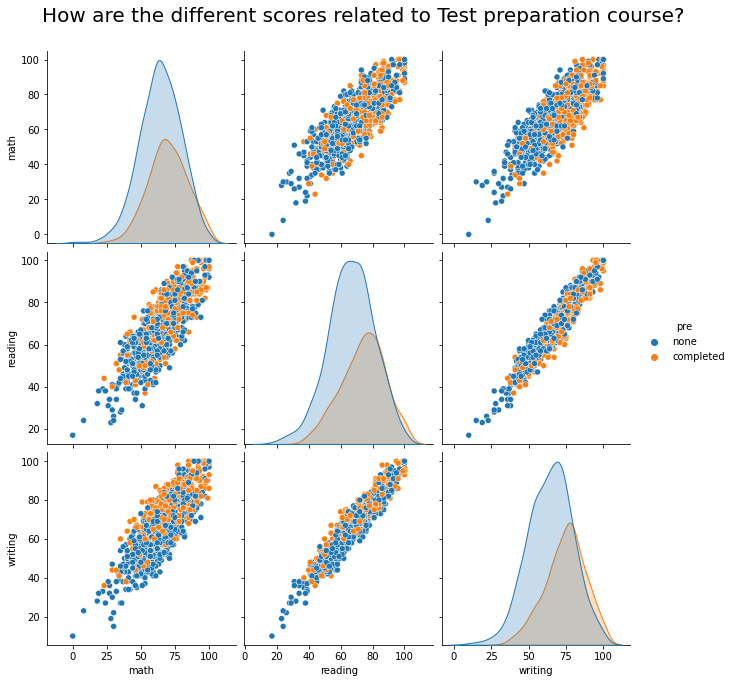

In [22]:
fig = sns.pairplot(df[["math", "reading", "writing", "pre"]], hue="pre", height=3);
fig.fig.suptitle("How are the different scores related to Test preparation course?", size=20, y=1.05);

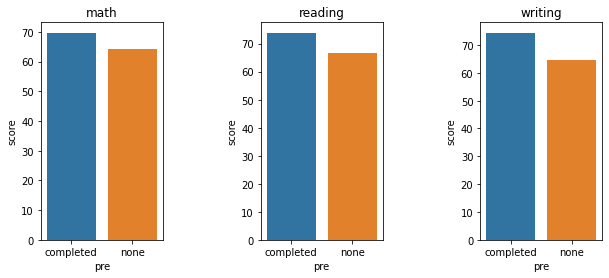

In [23]:
# test preparation course
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    pre_df = df.groupby("pre")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(pre_df.index, pre_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    
plt.show()

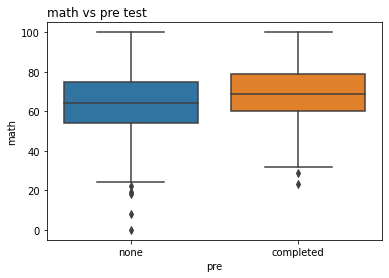

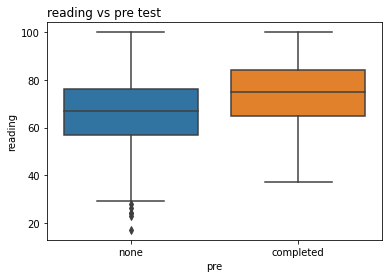

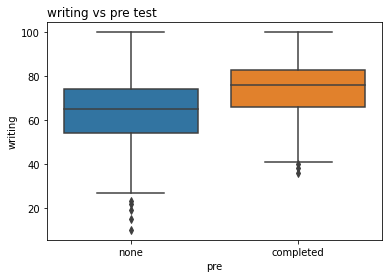

In [24]:
# Check outliers'test preparation course'
for item in df.columns[-3:]:
    sns.boxplot(x=df["pre"], y=df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

# Conclusions - test preparation course

1. Only 35.8% completed the test preparation course
2. The best grades came from those who finished the test preparation course
3. There are outliers, but we will not treat them as they will not interfere with the data analysis

### <b><span style='color:#DEB078'>5.4 |</span><span style='color:#C20E83'> parental level of education</span></b> 

In [25]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [26]:
parental_level_of_education_df=split_multicolumn(df['parental_education'])

In [27]:
# parental_education
parental_level_of_education_totals=parental_level_of_education_df.sum().sort_values(ascending=False)
parental_level_of_education_totals

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
dtype: int64

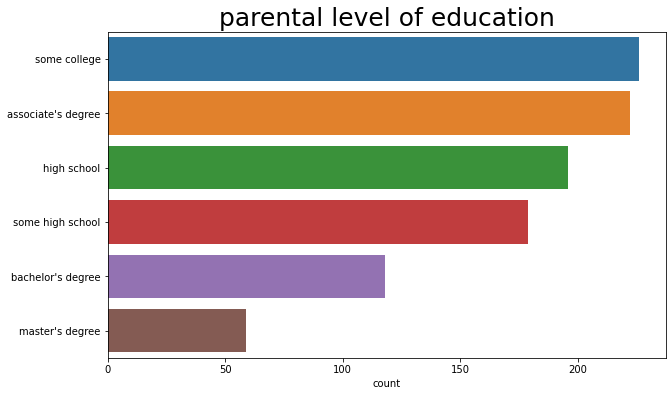

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=parental_level_of_education_totals,y=parental_level_of_education_totals.index)
plt.title("parental level of education",size=25)
plt.xlabel("count");

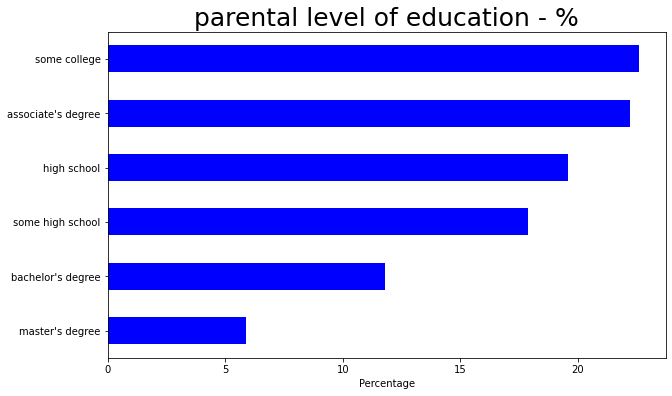

In [29]:
plt.figure(figsize=(10,6))
(df['parental_education'].value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='b')
plt.title("parental level of education - %",size=25)
plt.xlabel('Percentage');

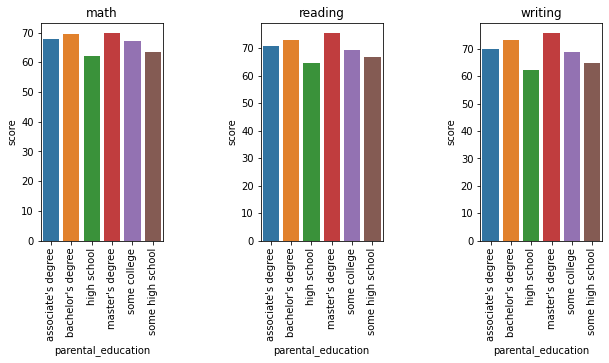

In [30]:
# parental_education
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    par_df = df.groupby("parental_education")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(par_df.index, par_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    plt.xticks(rotation=90)
plt.show()

# Conclusions - parental level of education

1. 'Some College' has the highest frequency (226) and 'master's degree' the lowest (59)
2. The data presented does not make it possible to verify a strong relationship between the 'parental level of education' and the 'scores'

### <b><span style='color:#DEB078'>5.5 |</span><span style='color:#C20E83'> Lunch</span></b> 

In [31]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

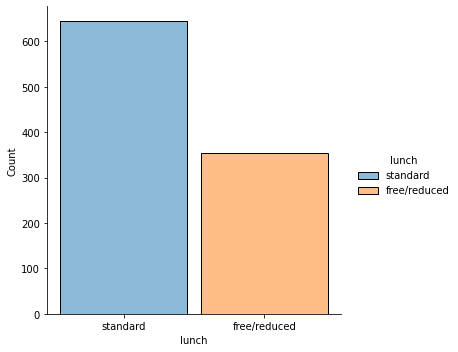

In [32]:
sns.displot(df,x='lunch',hue='lunch',shrink=0.9);

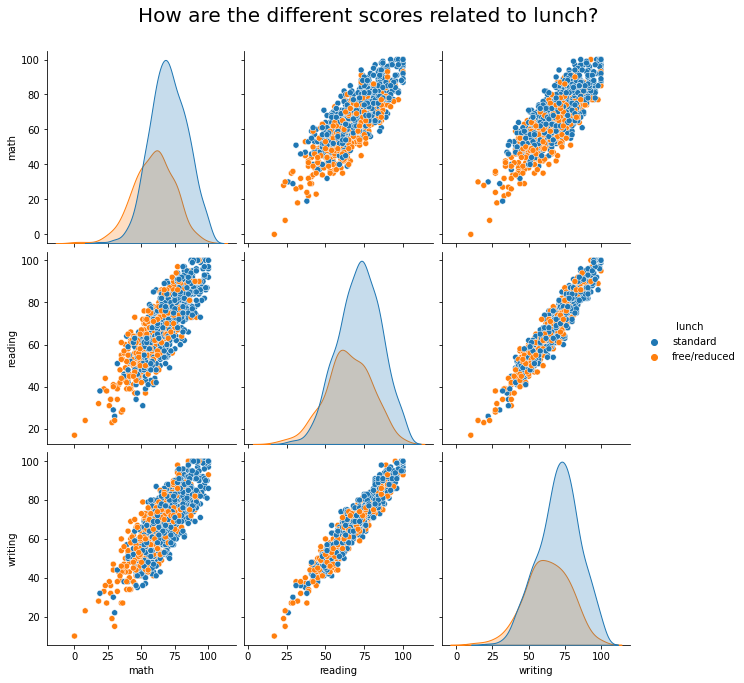

In [33]:
fig = sns.pairplot(df[["math", "reading", "writing", "lunch"]], hue="lunch", height=3);
fig.fig.suptitle("How are the different scores related to lunch?", size=20, y=1.05);

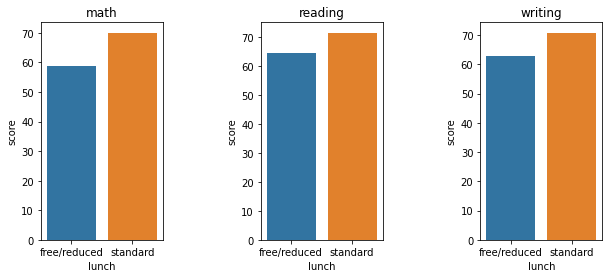

In [34]:
# lunch
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("lunch")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    
plt.show()

# Conclusions - lunch
1. 64.5% of students have a 'standard' meal
2. We clearly see that students with a 'standard' meal perform better in all subjects.

### <b><span style='color:#DEB078'>5.6 |</span><span style='color:#C20E83'> Correlation between features</span></b> 

In [35]:
# 'ethnicity' and 'parental_education'
fig=px.sunburst(df,path=['ethnicity','parental_education'])
fig.show();

In [36]:
from IPython.core.display import HTML

def multi_table(table_list):
        return HTML('<table><tr style="background-color:white;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')

In [37]:
# Quantitative distribution of features
nunique_df={var:pd.DataFrame(df[var].value_counts())
           for var in {'ethnicity', 'parental_education', 'lunch',
                       'pre','gender'}}

multi_table([nunique_df['ethnicity'],nunique_df['parental_education'],nunique_df['lunch'],nunique_df['pre'],nunique_df['gender']])

,ethnicity
group C,319
group D,262
group B,190
group E,140
group A,89
,parental_education
some college,226
associate's degree,222
high school,196
some high school,179


In [38]:
# Frequency distribution between features and 'math'
groupby_df={var:pd.DataFrame(df.groupby([var,'math']).size())
           for var in {'ethnicity', 'parental_education', 'lunch',
                       'pre','gender'}}

multi_table([groupby_df['ethnicity'],groupby_df['parental_education'],groupby_df['lunch'],groupby_df['pre'],groupby_df['gender']])

In [39]:
# Frequency distribution between features and 'reading'

groupby1_df={var:pd.DataFrame(df.groupby([var,'reading']).size())
           for var in {'ethnicity', 'parental_education', 'lunch',
                       'pre','gender'}}

multi_table([groupby1_df['ethnicity'],groupby_df['parental_education'],groupby_df['lunch'],groupby_df['pre'],groupby_df['gender']])

In [40]:
# Frequency distribution between features and 'writing'

groupby2_df={var:pd.DataFrame(df.groupby([var,'writing']).size())
           for var in {'ethnicity', 'parental_education', 'lunch',
                       'pre','gender'}}

multi_table([groupby2_df['ethnicity'],groupby_df['parental_education'],groupby_df['lunch'],groupby_df['pre'],groupby_df['gender']])

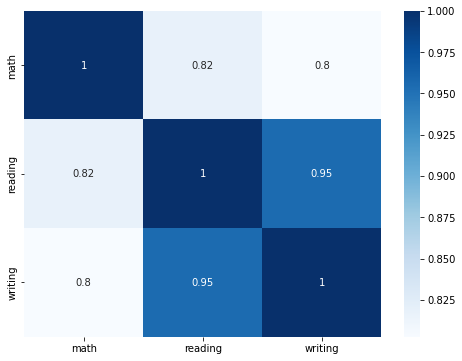

In [41]:
# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap='Blues');

## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>6  |  Machine Learning</div></b>

In [42]:
# transforming 'object' to numerical columns with LabelEncoder

labelencoder = LabelEncoder()
df_final = df.copy()
df_final["gender"] = labelencoder.fit_transform(df_final["gender"])
df_final["ethnicity"] = labelencoder.fit_transform(df_final["ethnicity"])
df_final["parental_education"] = labelencoder.fit_transform(df_final["parental_education"])
df_final["pre"] = labelencoder.fit_transform(df_final["pre"])
df_final["lunch"] = labelencoder.fit_transform(df_final["lunch"])

df_final.head()

,gender,ethnicity,parental_education,lunch,pre,math,reading,writing
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


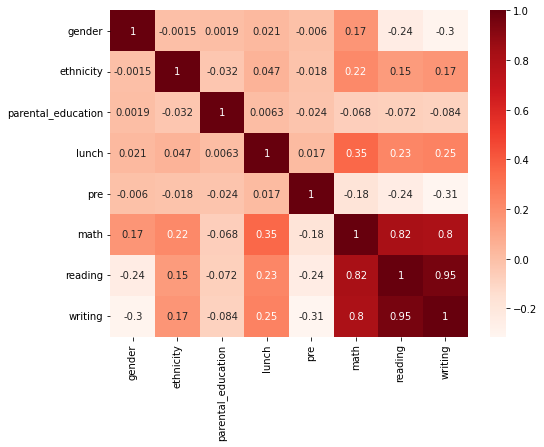

In [43]:
# heatmap df_final

plt.figure(figsize=(8,6))
sns.heatmap(df_final.corr(),annot=True, cmap='Reds');

### <b><span style='color:#DEB078'>6.1 |</span><span style='color:#C20E83'> KMeans Algorithm</span></b>


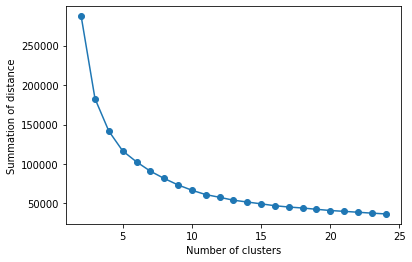

In [44]:
kmeans_dis = list()
for idx in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(df_final)
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

In [45]:
# Downloading libraries for clustering
! pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [46]:
scaled_X = df_final
scaled_X

,gender,ethnicity,parental_education,lunch,pre,math,reading,writing
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


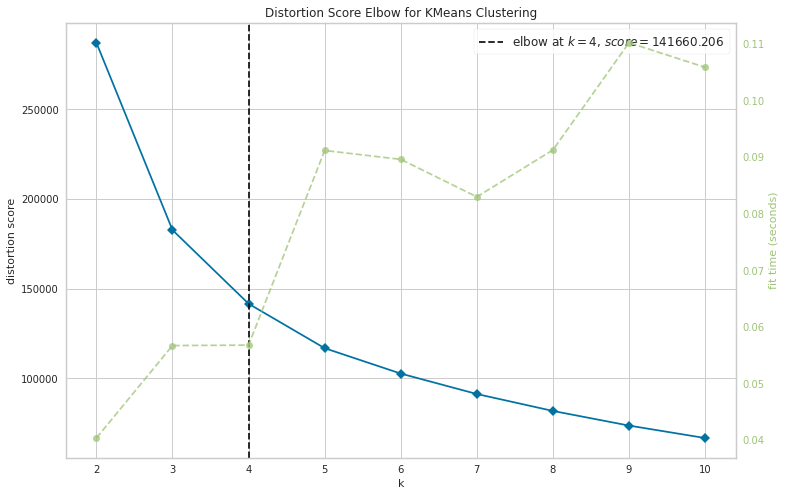

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# Definition of the number of Folds - KElbowVisualizer
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(scaled_X)
elbow_graph.show()

### <b><span style='color:#DEB078'>6.2 |</span><span style='color:#C20E83'> Let's use 4 clusters</span></b>

In [48]:
# KMeans and 4 clusters

kmeans = KMeans(init = "k-means++", n_clusters = 4)
kmeans.fit_transform(df_final)
kmeans_label = kmeans.labels_
df["classification"] = kmeans_label
df.head(10)

,gender,ethnicity,parental_education,lunch,pre,math,reading,writing,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,0
5,female,group B,associate's degree,standard,none,71,83,78,0
6,female,group B,some college,standard,completed,88,95,92,2
7,male,group B,some college,free/reduced,none,40,43,39,1
8,male,group D,high school,free/reduced,completed,64,64,67,3
9,female,group B,high school,free/reduced,none,38,60,50,1


In [49]:
# Checking the number of students in each cluster

freq = df['classification'].value_counts() 
print(freq) 

0    356
3    299
2    186
1    159
Name: classification, dtype: int64


In [50]:
# Checking the scores of each cluster
class_df = df.groupby("classification")[df.columns[-4:-1]].mean()
class_df

,math,reading,writing
classification,,,
0,71.365169,74.938202,73.994382
1,44.503145,46.981132,44.566038
2,85.489247,88.833333,88.193548
3,59.217391,61.866221,60.943144


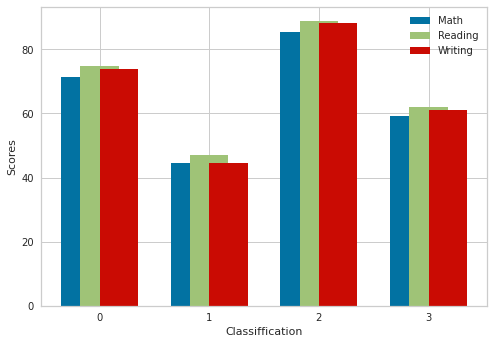

In [51]:
# Bar chart with the scores for each cluster

ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#CCFFFA;color:#C20E83;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment: </b>We can see that the scores for each cluster are similar in all subjects.</div>

In [52]:
# Making an average score for each cluster

class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([2, 0, 3, 1], dtype='int64', name='classification')

In [53]:
# (avg_score)
rank

classification
2    87.505376
0    73.432584
3    60.675585
1    45.350105
Name: total_ave_score, dtype: float64

### <b><span style='color:#DEB078'>6.3 |</span><span style='color:#C20E83'> Relationship of each feature with the clusters</span></b>

## IMPORTANT

**From now on, all graphs will show the clusters ranked in descending order, that is:**

Rank 0 = best cluster

Rank 1 = Second best cluster

Rank 2 = Third best cluster

Rank 3 = worst cluster

### <b><span style='color:#DEB078'>6.4 |</span><span style='color:#C20E83'> parental_education X clusters</span></b>

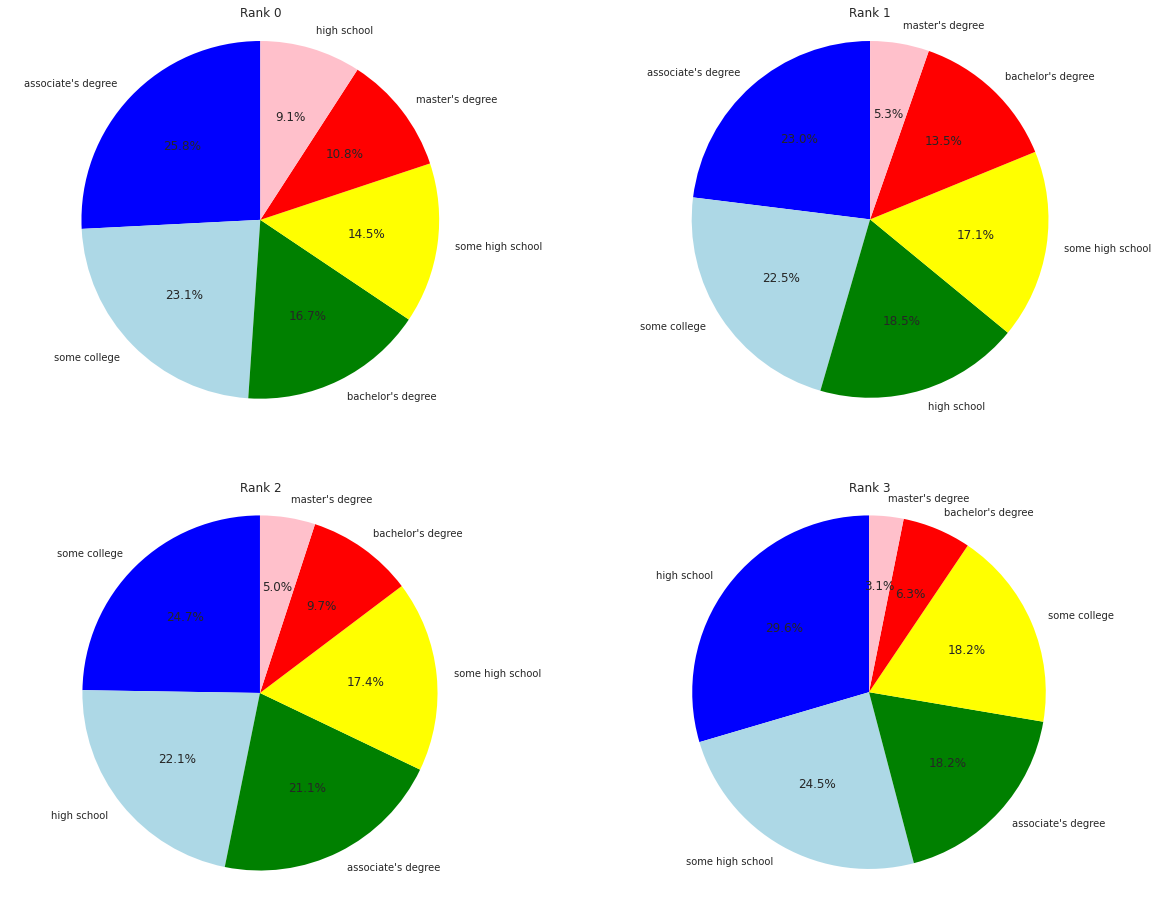

In [54]:
# parental_education X clusters

def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["blue","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(4):
        plt.subplot(2, 2, idx+1)
        num = "class"+ str(idx)
        num = df[df["classification"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parental_education")

## Conclusions - parental_education

1. Checking only 'master's degree' and 'bachelor's degree', we see that we have: 20% for Rank 0 and 9.4% for Rank 3.

2. This shows that parents with higher levels of education have children with better grades. But this is not conclusive, as this is a small portion of parents' education.

3. As for the other 'parental_education', it is not possible to reach a reliable conclusion.

### <b><span style='color:#DEB078'>6.5 |</span><span style='color:#C20E83'> test preparation course X clusters</span></b>

In [55]:
# test preparation course X clusters

def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(4)
    for idx in range(4):
        num = "class"+ str(idx)
        num = df[df["classification"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index() / percentage_of_column.values.sum()*100
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key])
            else:
                index_dict[key].append(percentage_of_column[key])
   
    percentage_of_column = df[df["classification"]==rank.index[2]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+0.8), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('% of students')
    ax.set_title("Relationship of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    

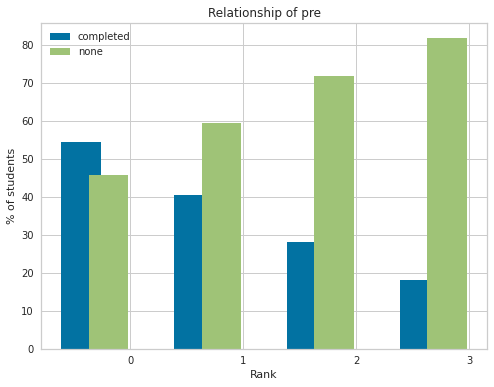

In [56]:
# test preparation course
plot_bar_chart("pre") 

## Conclusions - test preparation course

1. We can easily see that the majority (+/- 54%) of Rank 0 students have completed the 'test preparation course'

2. On the other hand, we see that more than 80% of Rank 3 students did not complete the 'test preparation course'

3. This clearly shows the relationship between this feature and student performance.


### <b><span style='color:#DEB078'>6.6 |</span><span style='color:#C20E83'> lunch X clusters</span></b>

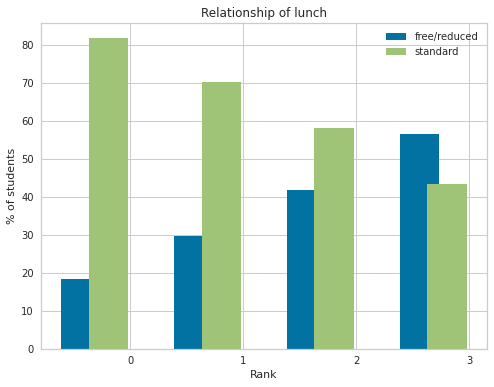

In [57]:
plot_bar_chart("lunch")

## Conclusions - lunch X clusters

1. The importance of lunch for student performance is also evident here. The higher the percentage of students with 'lunch standard', the better the result.

### <b><span style='color:#DEB078'>6.7 |</span><span style='color:#C20E83'> gender X clusters</span></b>


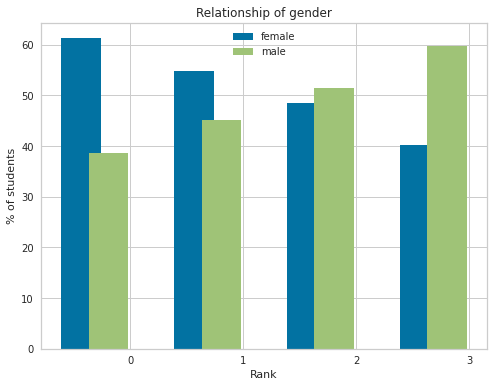

In [58]:
plot_bar_chart("gender")

## Conclusions - gender X clusters

1. We have more women than men in the best ranked clusters and more men than women in the worst ranked clusters.

### <b><span style='color:#DEB078'>6.8 |</span><span style='color:#C20E83'> ethnicity X clusters</span></b>

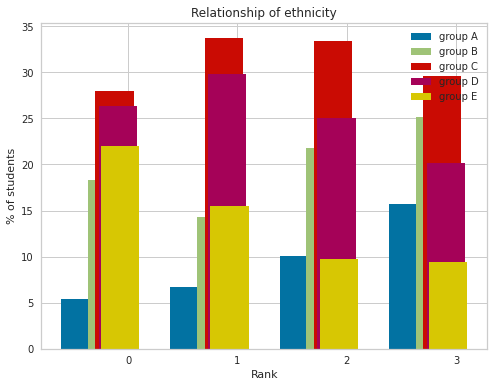

In [59]:
plot_bar_chart("ethnicity")

## Conclusions - ethnicity X clusters

1. 'Group A' has a higher percentage of students in the worst performing cluster.

2. 'Group E' has a higher percentage of students in the best performing cluster.

### <b><span style='color:#DEB078'>6.9 |</span><span style='color:#11958C'> Final Conclusions</span></b>


## Relationship of features with student performance

1. Having lunch is important for students to perform well.
2. Completing the preparation course also helps students' performance.
3. 'Gender' has little relationship with performance.
4. 'Ethnicity' has decreasing performance in the following order: E, D, C, B, A.
5. 'parental_education' is not conclusive on student performance.


In [60]:
# Adding the 'classification' column to df_final
df_final['classification'] = df['classification']
df_final.head()

,gender,ethnicity,parental_education,lunch,pre,math,reading,writing,classification
0,0,1,1,1,1,72,72,74,0
1,0,2,4,1,0,69,90,88,2
2,0,1,3,1,1,90,95,93,2
3,1,0,0,0,1,47,57,44,1
4,1,2,4,1,1,76,78,75,0


In [61]:
# Checking the data for each cluster using the mean
class_df = df_final.groupby("classification")[df_final.columns[-9:-1]].mean()
class_df

,gender,ethnicity,parental_education,lunch,pre,math,reading,writing
classification,,,,,,,,
0,0.452247,2.328652,2.421348,0.702247,0.595506,71.365169,74.938202,73.994382
1,0.597484,1.823899,2.704403,0.433962,0.817610,44.503145,46.981132,44.566038
2,0.387097,2.413978,2.322581,0.817204,0.456989,85.489247,88.833333,88.193548
3,0.515050,2.026756,2.548495,0.581940,0.719064,59.217391,61.866221,60.943144


In [62]:
rank

classification
2    87.505376
0    73.432584
3    60.675585
1    45.350105
Name: total_ave_score, dtype: float64

### <b><span style='color:#DEB078'>6.10 |</span><span style='color:#C20E83'> Summary of each cluster</span></b>

In [63]:
data =np.array([['87.5', '61.3%', '81.7%', '54.3%'],
                ['73.4', '54.8%', '70.2%', '40.5%'],
                ['60,7', '50.5%', '58.2%', '28,1%'],
                ['45.3', '40.3%', '43.4%', '18.2%']])

df = pd.DataFrame(data, index=range(0,4),columns=['avg_score', '% female', '% lunch standard', '% pre course complete'])

#Exibindo o DataFrame com o resumo dos clusters
df

,avg_score,% female,% lunch standard,% pre course complete
0,87.5,61.3%,81.7%,54.3%
1,73.4,54.8%,70.2%,40.5%
2,"60,7",50.5%,58.2%,"28,1%"
3,45.3,40.3%,43.4%,18.2%


## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>